**EC 414 - Spring 2019 - Prof. Kulis - HW 4 - Clustering (K-Means, DP-Means)**



Due Wed. March 27, 2019 - Before class starts.

**Problem 1:  K-Means**

Here you will apply K-Means on simple Gaussian data. You are given some code to guide you in implementing this clustering method.  Use of online code for K-Means is prohibited; use of the built-in scikitlearn function for K-Means is also prohibited. 
    

**(a)** Generate $3$ $2$D Gaussian clusters of data with the following means and covariances:

$\boldsymbol{\mu}_1 = [2,2]^T, \boldsymbol{\mu}_2 = [-2,2]^T, \boldsymbol{\mu}_3 = [0,-2]^T$,

$\Sigma_1 = [[0.02,0];[0,0.02]]$, $\Sigma_2 = [[0.2,0];[0,0.2]]$, $\Sigma_3 = [[0.05,0];[0,0.05]]$ 

Let each cluster of data have $50$ points. Plot the generated Gaussian data.

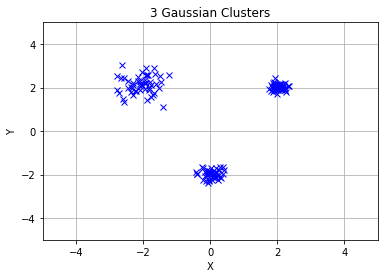

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 2D Gaussian Data with 3 clusters of 3 different means
# Write code here:
mean_1 = [2,2]
cov_1 = [[0.02,0], [0,0.02]]
C1 = np.array(np.random.multivariate_normal(mean_1, cov_1, 50))

mean_2 = [-2,2]
cov_2 = [[0.2,0], [0,0.2]]
C2 = np.array(np.random.multivariate_normal(mean_2, cov_2, 50))

mean_3 = [0,-2]
cov_3 = [[0.05,0], [0,0.05]]
C3 = np.array(np.random.multivariate_normal(mean_3, cov_3, 50))

DATA = np.concatenate((C1, C2, C3), axis=0)

# Plotting
# Write code here:
plt.plot(DATA.T[0], DATA.T[1], 'bx')
plt.title("3 Gaussian Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()
plt.show()


**(b)** Implement K-Means and apply it to the Gaussian data above. The code below contains comments of what needs to be coded up at a specific part of the code.  Please write your code below these comments where necessary. 

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations).  

Iteration:  1


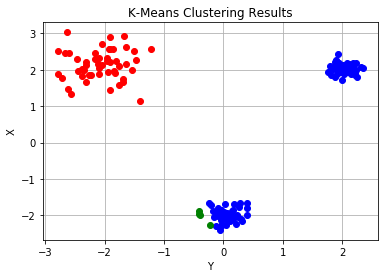

Iteration:  2


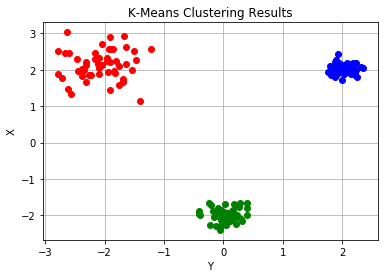

Iteration:  3


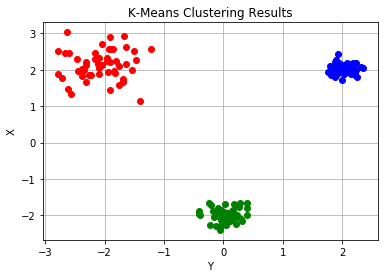

In [8]:
## K-Means implementation:

num_clusters = 3

### CODE 1 - Randomly initialize 3 means: ###
## Write code below here:
means = 6*np.random.random_sample((3,2))-3


##############################################

# initializations
labels = np.ones((DATA.shape[0],1))
converged = 0
iteration = 0
convergence_threshold = 2
while (converged==0):
    iteration += 1
    print('Iteration: ',iteration)
    
    ### CODE 2 - Assignment Step - Assign each data observation to the cluster with the nearest mean: ###
    ## Write code below here:
    changed_labels = 0
    for i in range(DATA.shape[0]):
        min_dist = 100
        min_j = 0
        for j in range(means.shape[0]):
            if np.linalg.norm(DATA[i]-means[j]) < min_dist:
                min_dist = np.linalg.norm(DATA[i]-means[j])
                min_j = j
        if(int(labels[i]) != min_j):
            labels[i] = min_j
            changed_labels += 1
            
    
    ###################################################################
    
    
    ### CODE 3 - Mean Updating - Update the cluster means ###
    ## Write code below here:
    counts = np.zeros((3,1))
    means = np.zeros((3,2))
    for i in range(DATA.shape[0]):
        counts[int(labels[i])] += 1
        means[int(labels[i])] += DATA[i]
    for i in range(means.shape[0]):
        means[i][0] /= counts[i][0]
        means[i][1] /= counts [i][0]
    
    ###########################################################
    
    ### CODE 4 - Check for convergence ###
    ## Write code below here:

    if ( changed_labels < convergence_threshold):
        converged=1
    
    #############################################################
    
    ### CODE 5 - Plot clustering results after each iteration: ###
    ## Write code below here:
    for i in range(DATA.shape[0]):
        if(int(labels[i])==0):
            color = 'bo'
        elif(int(labels[i])==1):
            color = 'go'
        elif(int(labels[i])==2):
            color = 'ro'
        
        plt.plot(DATA[i][0], DATA[i][1], color)

    plt.title("K-Means Clustering Results")
    plt.xlabel("Y")
    plt.ylabel("X")
    plt.grid()
    plt.show()
    
    
    ###################################################################



**Problem 2: DP Means**

Here, you will implement DP-Means and test it out on National Basketball Association (NBA) data from the 2018-2019 season (currently ongoing season).



**(a)** Describe what the $\lambda$ parameter does in the DP-Means algorithm discussed in class. 

The lambda parameter in DP-means is used to decide when to add more clusters to the data set. When taking the distances to the nearest mean for each point, if the distance to the nearest mean is greater than the predetermined value for lambda, you create a new cluster for this data point. Basically, lambda is the maximum value you want a point to be from a mean

**(b)** Read in the NBA data from the ''NBA_stats_2018_2019.xlsx'' file and plot the Minutes Per Game (MPG) vs Points Per Game (PPG) statistics for all NBA players (a player is represented by a row of the data).  

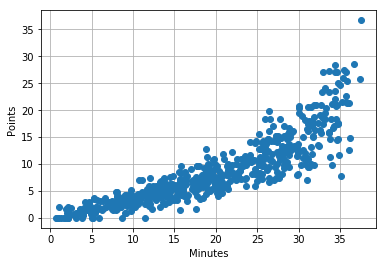

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Following two imports are for coloring the graph
from matplotlib import cm
from matplotlib import colors

################################
## Load data from spreadsheet ##
################################

# Write code here
raw_data = pd.ExcelFile("NBA_stats_2018_2019.xlsx")

data_matrix = np.zeros((2,raw_data.parse("Sheet1").shape[0]))
data_matrix[0] = raw_data.parse("Sheet1")["MPG"].values
data_matrix[1] = raw_data.parse("Sheet1")["PPG"].values

num_points = data_matrix.shape[1]

############################
## Plot data - MPG vs PPG ##
############################

# Write code here
plt.plot(data_matrix[0], data_matrix[1], 'o')
plt.xlabel("Minutes")
plt.ylabel("Points")
plt.grid()
plt.show()

data_matrix = np.transpose(data_matrix)

**(c)** Implement DP-Means and apply it to the $2$D (MPG, PPG) NBA data obtained above. The code below contains comments of what needs to be coded up at a specific part of the code.  Please write your code below these comments where necessary. Use of online code for DP-Means is prohibited; use of any Python built-in function for DP-Means is also prohibited. 

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations) and the number of existing clusters also stays the same.  

Current iteration:  1


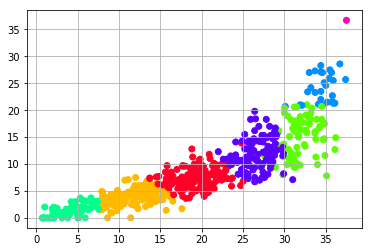

Current iteration:  2


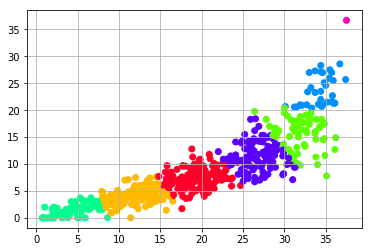

Current iteration:  3


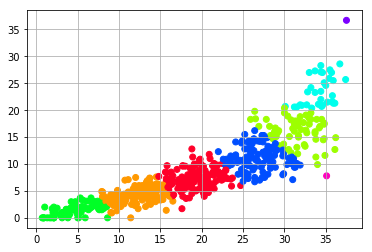

Current iteration:  4


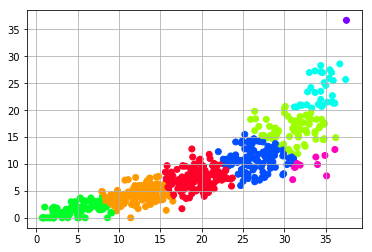

Current iteration:  5


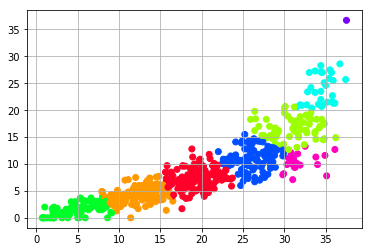

Current iteration:  6


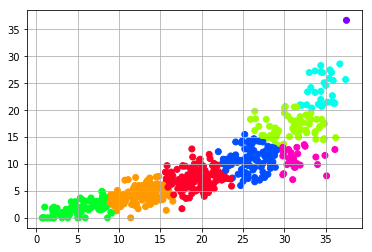

Current iteration:  7


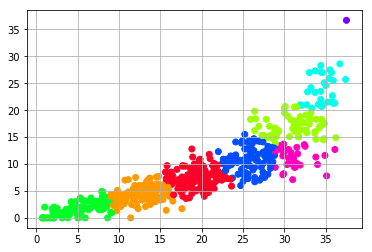

Current iteration:  8


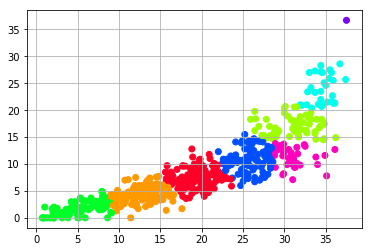

Current iteration:  9


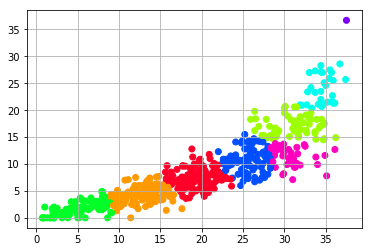

Current iteration:  10


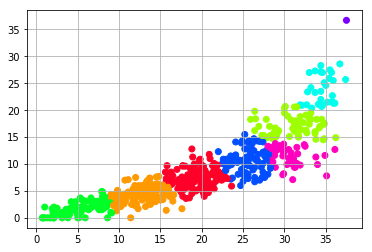

Current iteration:  11


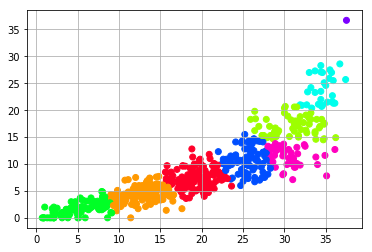

Current iteration:  12


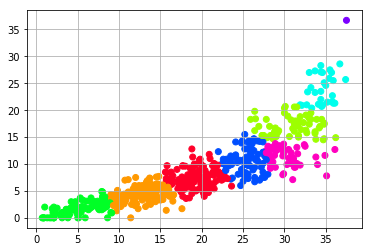

Current iteration:  13


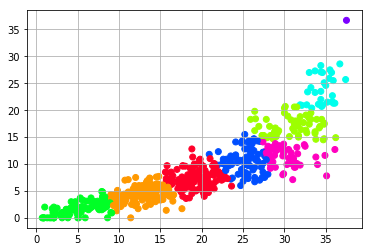

Current iteration:  14


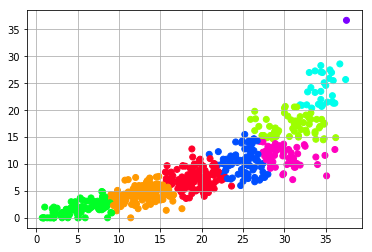

Current iteration:  15


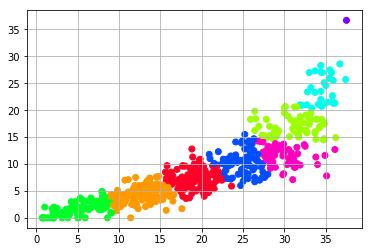

Current iteration:  16


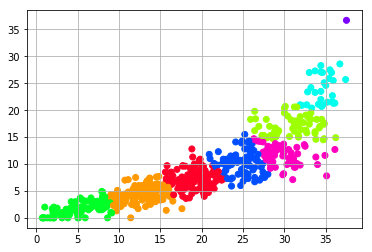

Current iteration:  17


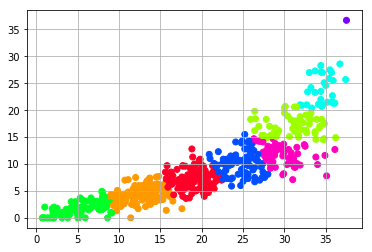

Current iteration:  18


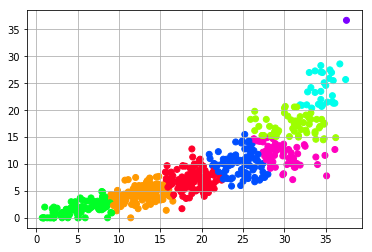

Current iteration:  19


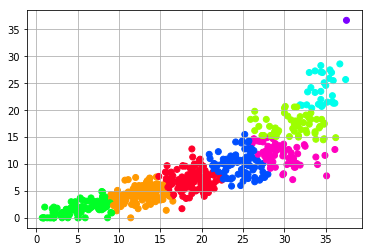

Current iteration:  20


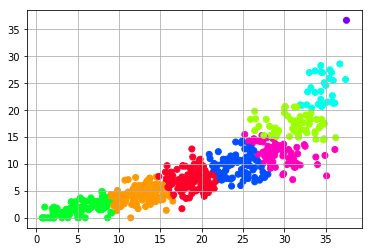

Current iteration:  21


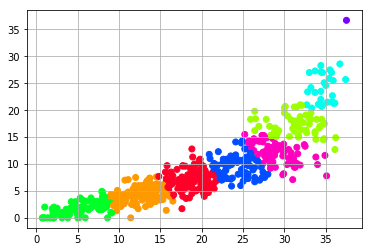

Current iteration:  22


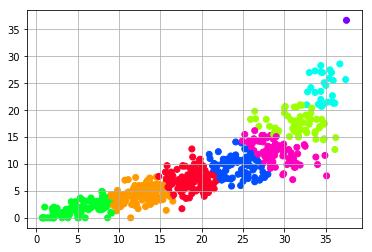

Current iteration:  23


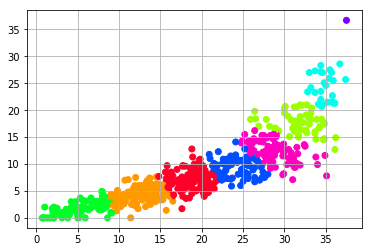

Current iteration:  24


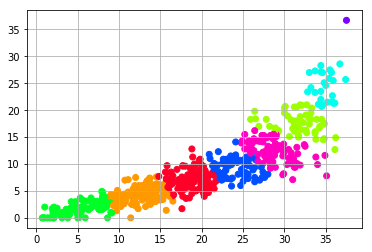

Current iteration:  25


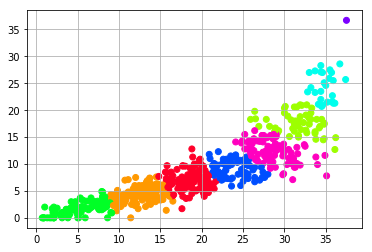

Current iteration:  26


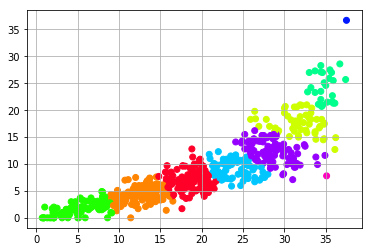

Current iteration:  27


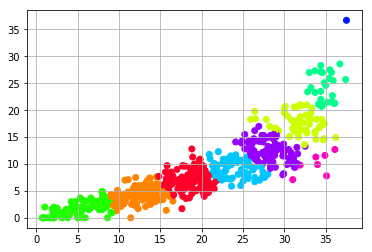

Current iteration:  28


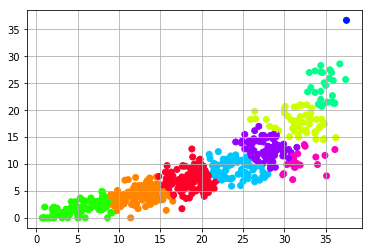

Current iteration:  29


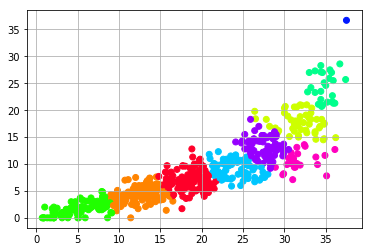

Current iteration:  30


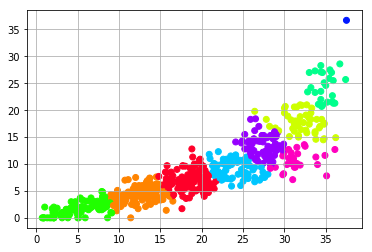

Current iteration:  31


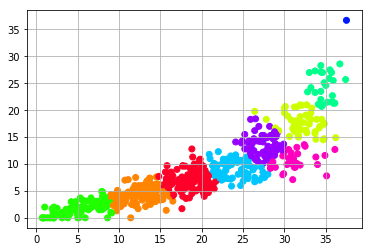

Current iteration:  32


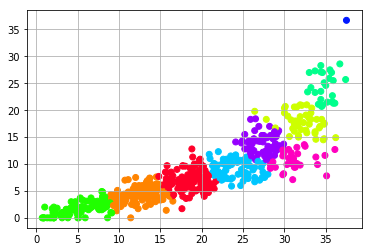

Current iteration:  33


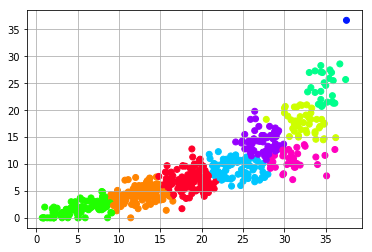

Current iteration:  34


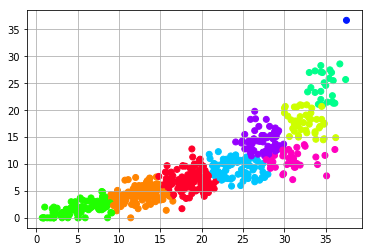

Current iteration:  35


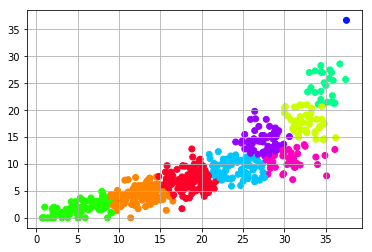

Current iteration:  36


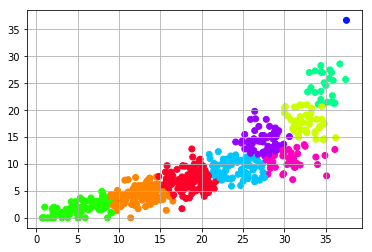

In [4]:
## DP-Means Implementation: ##
## This implementation takes 36 iterations, which is a lot more than the TA's 8.
## However, it produces very similar graphs, so I think it is just the order of iteration that is causing the issue
## but I can't seem to fix it. I iterate through the data points in the order they appear in the excel table

# Parameter Initializations
LAMBDA = 8
convergence_threshold = 1

### DP Means - Initializations for algorithm ###
# cluster count
K = 1

# sets of points that make up clusters
L = []
L.append(range(num_points))

# Class indicators/labels
Z = np.ones((1,num_points))

# means
MU = []
MU.append(np.mean(data_matrix,axis=0))
################################################

# Initializations for algorithm:
converged = 0
t = 0
while converged == 0:
    t += 1
    print('Current iteration: ',t)
    
    clusters_changed = False
    means_changed = False
    
    ## Per Data Point: ##
    for i in np.arange(num_points):
        
        ### CODE 1 - Calculate distance from current point to all currently existing clusters ###
        ## Write code below here:
        dists = []
        for mean in MU:
            dists.append(np.linalg.norm(mean - data_matrix[i]))

        #########################################################################################
        
        
        ### CODE 2 - Look at how the min distance of the cluster distance list compares to LAMBDA ###
        ## Write code below here:

        if ( np.min(dists) > LAMBDA):
            # make new cluster solely consisting of the new point
            Z[0][i] = K
            K+=1
            MU.append(data_matrix[i])
            clusters_changed = True
        else:
            # assign point to the closest cluster
            if Z[0][i] != np.argmin(dists):
                Z[0][i] = np.argmin(dists)
        #############################################################################################
    
    ### CODE 3 - Form new sets of points (clusters) ###
    ## Write code below here:
    L = []
    for i in range(K):
        L.append([])
    
    for i in np.arange(num_points) :
        L[int(Z[0][i])].append(data_matrix[i])
        
    
    ##################################################################
    
    ### CODE 4 - Recompute means per cluster ###
    ## Write code below here:
    new_MU = []
    for l in L:
        new_MU.append(np.mean(l, axis=0))
        
    if not np.array_equal(new_MU, MU):
        means_changed = True
    
    MU = new_MU
    ####################################################
    
    ### CODE 5 - Plot clustered data per iteration ###
    ## Write code below here:
    cmap = cm.get_cmap('gist_rainbow')
    normalize = colors.Normalize(vmin=np.min(Z[0]), vmax=np.max(Z[0]))
    colorspectrum = [cmap(normalize(value)) for value in Z[0]]
    plt.scatter(data_matrix.T[0], data_matrix.T[1], color = colorspectrum)
    plt.grid()
    plt.show()
    
    ##########################################################
    
    ### CODE 6 - Test for convergence: number of clusters doesn't change and means stay the same ###
    ## Write code below here
    
    if ((not clusters_changed) and (not means_changed)):
        converged = 1
    else:
        converged = 0
    ####################################################





**(d)** Run the DP-Means code created above for the following $\lambda$ values:

$\underline{\lambda} = [4,10,14,24]$.

 Plot the resulting clusters for each $\lambda$ value and discuss the results.   

LAMBDA: 4 




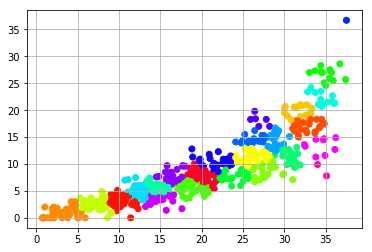

LAMBDA: 10 




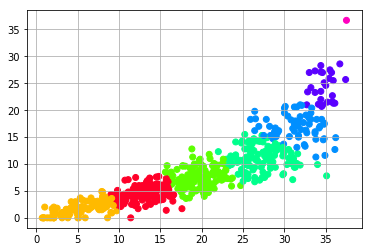

LAMBDA: 14 




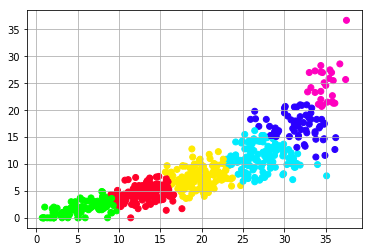

LAMBDA: 24 




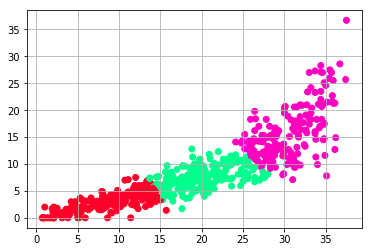

In [5]:
# Plotting of results for different lambdas:
def DP_Means(Lambda):
    K = 1 
    L = []
    L.append(range(num_points))
    Z = np.ones((1,num_points))
    MU = []
    MU.append(np.mean(data_matrix,axis=0))
    
    converged = 0
    while converged == 0:
        clusters_changed = False
        means_changed = False
        
        ## Per Data Point: ##
        for i in np.arange(num_points):
            dists = []
            for mean in MU:
                dists.append(np.linalg.norm(mean - data_matrix[i]))

            if ( np.min(dists) > Lambda):
                # make new cluster solely consisting of the new point
                Z[0][i] = K
                K+=1
                MU.append(data_matrix[i])
                clusters_changed = True
            else:
                # assign point to the closest cluster
                if Z[0][i] != np.argmin(dists):
                    Z[0][i] = np.argmin(dists)
        
        L = []
        for i in range(K):
            L.append([])

        for i in np.arange(num_points) :
            L[int(Z[0][i])].append(data_matrix[i])

        new_MU = []
        for l in L:
            new_MU.append(np.mean(l, axis=0))

        if not np.array_equal(new_MU, MU):
            means_changed = True

        MU = new_MU

        if ((not clusters_changed) and (not means_changed)):
            converged = 1
        else:
            converged = 0
            
    cmap = cm.get_cmap('gist_rainbow')
    normalize = colors.Normalize(vmin=np.min(Z[0]), vmax=np.max(Z[0]))
    colorspectrum = [cmap(normalize(value)) for value in Z[0]]
    plt.scatter(data_matrix.T[0], data_matrix.T[1], color = colorspectrum)
    plt.grid()
    plt.show()

print('LAMBDA: 4','\n\n')
##############
# Lambda - 4##
##############

# Write code here
DP_Means(4)

print('LAMBDA: 10','\n\n')
##############
# Lambda - 10#
##############

# Write code here
DP_Means(10)

print('LAMBDA: 14','\n\n')
##############
# Lambda - 14#
##############

# Write code here
DP_Means(14)

print('LAMBDA: 24','\n\n')
##############
# Lambda - 24#
##############

# Write code here
DP_Means(24)



## discussion of results?

As we can see in these results, a higher value of lambda leads to fewer, larger clusters, whereas smaller values of lambdas lead to many small clusters. This makes sense, because with a smaller lambda, it will take a much smaller point-to-mean distance to cause the creation of a new cluster, leading to a lot of clusters. We can see that the radius of each cluster is approximately the sqrt of lambda, which matches the euclidian distance formula.